In [1]:
# Intent of the application

#The purpose of this program is to explore the Iris dataset as the first programming assignment for the Data Mining course, perform exploratory operations, display features of the dataset, and create plots for the dataset.

# Dataset to be used, including source

#The dataset to be used is the Iris dataset, for which more information can be found here: https://www.ritchieng.com/machine-learning-iris-dataset/

# Use case

#The use case of this application could be to demonstrate basic operations with datasets, as the first steps to take when exploring a dataset for the first time. 

# Variables

#Sepal.Length: The length of the sepal, which is the outer part of the flower that encloses a developing bud. 
#Sepal.Width: The width of the sepal.
#Petal.Length: The length of the petal of the flower, which are leaves that surround the reproductive parts of a flower. 
#Petal.Width: The width of the petal of the flower. 

# Labels

#Species: Describes the species of the flower associated to the previous measurements. 

# Data import

#In this application, there is no input needed from the user.

# Libraries

#Sklearn: Used to import the Iris dataset. 
#Numpy: Used to obtain the norm of a vector, and the distance between two vectors
#Pandas: Used to manage the vectors in the Iris dataset, as well as to perform the dot product between two vectors.

In [9]:
# Imports
from sklearn import datasets
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean
from plotnine import ggplot, aes, geom_point, geom_smooth

In [3]:
# Library source

#Sklearn: Source and latest changes -> https://scikit-learn.org/dev/whats_new/v1.3.html
#Numpy: Source and latest releases -> https://numpy.org/news/
#Pandas: Source and latest changes -> http://pandas.pydata.org/pandas-docs/stable/

# Application outputs

#The expected outputs for this application are: 

#Dot product between the sepal length and the sepal width vectors
#Norm of the sepal length vector
#Distance between the sepal length and the sepal width vectors

In [4]:
# Mathematical background

# Dot product: Algebraic operation that takes two vectors (or array of numbers) of equal length, and outputs a single escalar. }
# It could also be understood as the distance between the two vectors, but this would be a more geometrical definition
# Norm: Measurement that tells us the "magnitude" or "Length" of a vector. Basically, the difference between the "origin" 
# and the final point in a vector
# In the case of the norm of two vectors, it basically is the distance between them. The smaller it is, the "closer" and more 
# related they are

In [5]:
# Proposed solution

# Now we import the dataset
iris = datasets.load_iris()

# We can perform a similar exploration as we did in R
print("Feature names (predictor columns)")
print(iris["feature_names"])

print("Possible outcomes")
print(iris["target_names"])

# Now we calculate the dot product between the sepal length vector and the sepal width vector
iris_df = pd.DataFrame(data = iris["data"], columns = iris["feature_names"])
print("First five values of each predictor column")
print(iris_df.head())


print("Minimum value for each of the predictors:")
for col in iris_df.columns:
    print(min(iris_df[col]))
    
print("Mean value for each of the predictors:")
for col in iris_df.columns:
    print(mean(iris_df[col]))
    
print("Maximum value for each of the predictors:")
for col in iris_df.columns:
    print(max(iris_df[col]))
    
    
print("Dot product between sepal length and sepal width")
sepal_length = iris_df["sepal length (cm)"]
sepal_width = iris_df["sepal width (cm)"]
print(sepal_length@sepal_width)

print("Norm of the sepal length vector")
print(norm(sepal_length))

print("Distance between the sepal length vector and the sepal width vector")
print(norm(sepal_length - sepal_width))

Feature names (predictor columns)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Possible outcomes
['setosa' 'versicolor' 'virginica']
First five values of each predictor column
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Minimum value for each of the predictors:
4.3
2.0
1.0
0.1
Mean value for each of the predictors:
5.843333333333334
3.0573333333333332
3.758
1.1993333333333334
Maximum value for each of the predictors:
7.9
4.4
6.9
2.5
Dot product between sepal length and sepal width
2673.4300000000003
Norm of the sepal length vector
72.2762063199

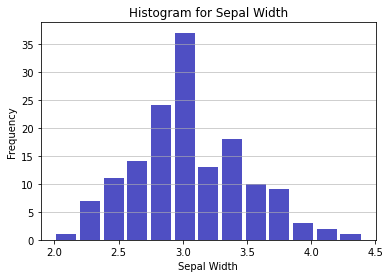

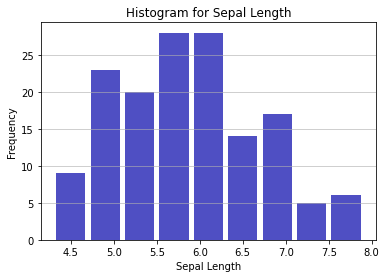

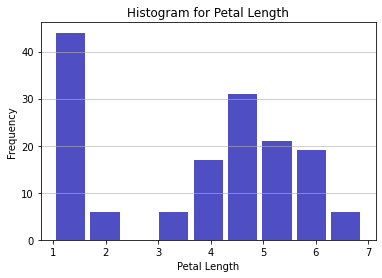

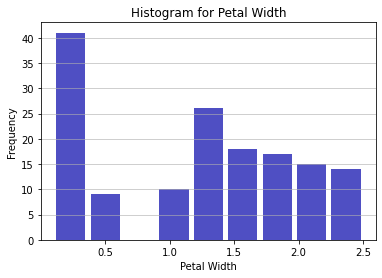

In [6]:
# Visualizations

# First, we can look at the distribution of each of the predictors

plt.hist(x = sepal_width, bins = "auto", color="#0504aa", alpha = 0.7, rwidth=0.85)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.title("Histogram for Sepal Width")
plt.show()

plt.hist(x = sepal_length, bins = "auto", color="#0504aa", alpha = 0.7, rwidth=0.85)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram for Sepal Length")
plt.show()

plt.hist(x = iris_df["petal length (cm)"], bins = "auto", color="#0504aa", alpha = 0.7, rwidth=0.85)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.title("Histogram for Petal Length")
plt.show()

plt.hist(x = iris_df["petal width (cm)"], bins = "auto", color="#0504aa", alpha = 0.7, rwidth=0.85)
plt.grid(axis = "y", alpha = 0.75)
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.title("Histogram for Petal Width")
plt.show()

# We can see that the Sepal Width is normally distributed, while sepal length and petal length are not. 
# Sepal length seems to be completely randomly distributed, while petal length is split in two groups, 
# with a large gap between them. 

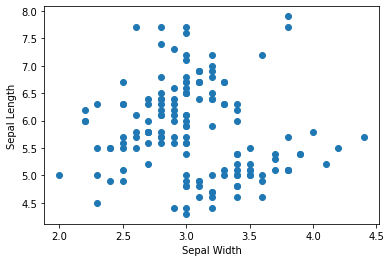

In [7]:
# Here we can plot the sepal width and the sepal length. 
fig, ax = plt.subplots()

ax.plot(sepal_width, sepal_length, "o",linewidth=2.0)
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

# By creating a plot of sepal length vs sepal width, we cannot see any obvious or clear relationship. 
# By using a linear model to fit a line for the points, we can see that there really is no direct relationship 
# between the sepal length and the sepal width. 

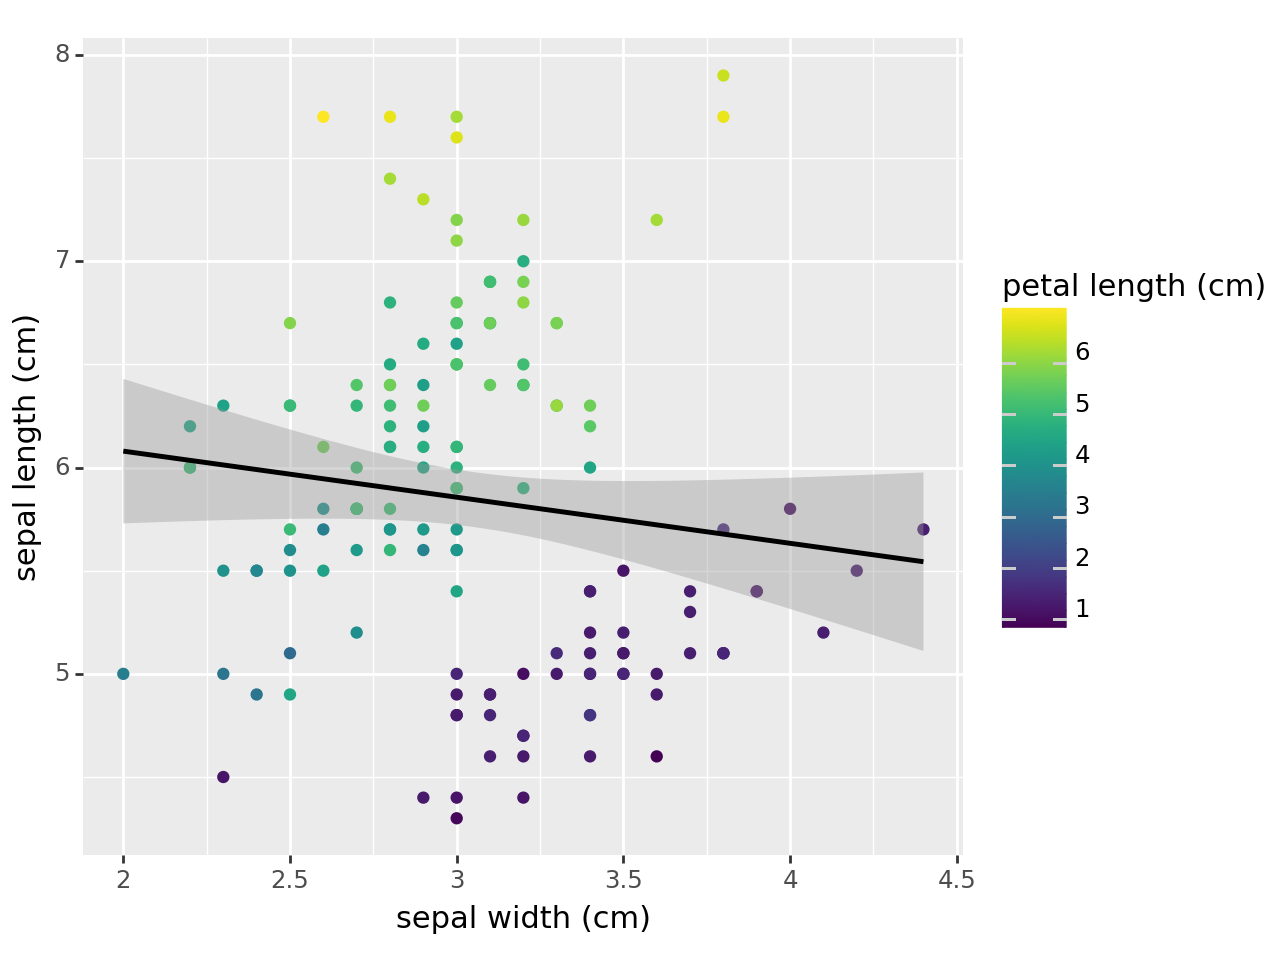

<Figure Size: (640 x 480)>

In [10]:
# We can then create a plot with sepal width, sepal length, and petal length
petal_length = iris_df["petal length (cm)"]

(
    ggplot(iris_df)  # What data to use
    + aes(x="sepal width (cm)", y="sepal length (cm)", color="petal length (cm)")  # What variable to use
    + geom_point()  # Geometric object to use for drawing
    + geom_smooth(method="lm")
)

In [ ]:
# We can also use a visualization package, such as sweetviz
import sweetviz as sv
my_report = sv.analyze(iris_df)
my_report.show_html()

# It will automatically generate a HTML report with basic information on the dataset

In [ ]:
# Analysis of results

# We can see a relationship, in which most of the points on the bottom-right part of the plot tend to be darker, 
# which with the color gradient code, we know it means that most of these points have a petal length within 1 and 3, 
# while most of the points on the upper-left part of the plot tend to be lighter, which means they are between 4 and 6. 

# In other words, the higher the sepal width, the lower the sepal length, the petal length would decrease.
# The lower the sepal width, the higher the sepal length, the petal length would increase. 

# Unfortunately, the dot product by itself does not tell us much. In this case, we can only see that the dot product is possitive, 
# and it has a high magnitude. This could indicate a high degree of correlation, but it is not guaranteed. 

#With the norm of the sepal length vector, we can tell that the magnitudes of each point in the vector may not be very large. 
#Finally, with the distance obtained between the sepal length and the sepal width vector we can see that it was low, 
# which would confirm, with the large dot product previously obtained, that the two vectors are highly related. 